In [ ]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
sns.set()

# 그래프 기본 설정
#plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

# 데이터 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 학습용과 검증용으로 나누는 함수
from sklearn.model_selection import train_test_split

# 교차 검증
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 평가함수
# 분류용
from sklearn.metrics import f1_score

# 모델의 최적의 하이퍼 파라미터를 찾기 위한 도구
from sklearn.model_selection import GridSearchCV

# 머신러닝 알고리즘 - 분류
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

# 학습 모델 저장을 위한 라이브러리
import pickle

### 프로젝트 셋팅

In [ ]:
# 학습이 완료된 모델을 저장할 파일 이름
best_model_path = 'model/best_model_pitcher_newData.dat'

# 교차검증 횟수
cv_count = 10

# 교차 검증
kfold = KFold(n_splits=cv_count, shuffle=True, random_state=1)

# 평가 결과를 담을 리스트
# 필요하다면 다른 것도 만들어주세요
f1_macro_list = []
f1_micro_list = []

# 학습 모델 이름
model_name_list = []

### 데이터 준비

In [ ]:
df_all = pd.read_csv('투수_연봉_학습데이터.csv')

In [ ]:
# 표준화를 위해 결과데이터를 제외한다.
X = df.drop(['pid', '선수', '포지션', '팀', '연봉 총수령액(만원)', '연봉등급'], axis=1)

# 표준화
scaler1 = StandardScaler()
scaler1.fit(X)

StandardScaler()

In [ ]:
# 연봉 등급 인코딩
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(df['연봉등급'])

In [ ]:
# 입력과 결과로 나눈다.
X = df.drop(['pid', '선수', '포지션', '팀', '연봉 총수령액(만원)', '연봉등급'], axis=1)
y = df['연봉등급']

In [ ]:
# 표준화
X = scaler1.transform(X)
X

array([[ 1.32064137, -0.31971582,  1.63470534, ..., -0.13039627,
        -1.62057448, -1.39799281],
       [ 1.18693245,  2.12489942, -0.54654124, ..., -0.13039627,
        -1.47839536, -1.04633964],
       [ 1.27384325,  1.88043789, -0.54654124, ..., -0.13039627,
        -1.33621625, -0.88516528],
       ...,
       [-0.61813804, -0.61306965, -0.54654124, ..., -0.13039627,
         1.2230078 ,  1.15149264],
       [-0.44431644, -1.1019927 , -0.54654124, ..., -0.13039627,
         1.50736603,  1.28336257],
       [-0.5980817 , -1.19977731, -0.43173879, ..., -0.13039627,
         1.64954514,  1.40058029]])

In [ ]:
train_X = X
train_y = y_encoded

### 기본 모델 사용하기

In [ ]:
# GradientBoost
gb_basic_model = GradientBoostingClassifier()

# 교차 검증을 수행한다
f1_macro = cross_val_score(gb_basic_model, train_X, train_y, scoring='f1_macro', cv=kfold).mean()
f1_micro = cross_val_score(gb_basic_model, train_X, train_y, scoring='f1_micro', cv=kfold).mean()


# 평가 결과를 담아준다.
f1_macro_list.append(f1_macro)
f1_micro_list.append(f1_micro)

# 학습 모델 이름을 담아준다.
model_name_list.append("GradientBoost Basic")

In [ ]:
# LGBM
lgbm_basic_model = LGBMClassifier(verbose=-1)

# 교차 검증을 수행한다
f1_macro = cross_val_score(lgbm_basic_model, train_X, train_y, scoring='f1_macro', cv=kfold).mean()
f1_micro = cross_val_score(lgbm_basic_model, train_X, train_y, scoring='f1_micro', cv=kfold).mean()

# 평가 결과를 담아준다.
f1_macro_list.append(f1_macro)
f1_micro_list.append(f1_micro)

# 학습 모델 이름을 담아준다.
model_name_list.append("LGBM Basic")

In [ ]:
# XGBoost
xgboost_basic_model = XGBClassifier(verbose=-1, silent=True)

# 교차 검증을 수행한다
f1_macro = cross_val_score(xgboost_basic_model, train_X, train_y, scoring='f1_macro', cv=kfold).mean()
f1_micro = cross_val_score(xgboost_basic_model, train_X, train_y, scoring='f1_micro', cv=kfold).mean()

# 평가 결과를 담아준다.
f1_macro_list.append(f1_macro)
f1_micro_list.append(f1_micro)

# 학습 모델 이름을 담아준다.
model_name_list.append("XGBoost Basic")

In [ ]:
# HardVoting 구성
temp_model7 = GradientBoostingClassifier()
temp_model8 = LGBMClassifier(verbose=-1)
temp_model9 = XGBClassifier(verbose=-1, silent=True)

hard_voting_model_list = [
    ('model7', temp_model7),
    ('model8', temp_model8),
    ('model9', temp_model9),
]

hard_voting_basic_model = VotingClassifier(estimators=hard_voting_model_list, voting='hard')

# 교차 검증을 수행한다
f1_macro = cross_val_score(hard_voting_basic_model, train_X, train_y, scoring='f1_macro', cv=kfold).mean()
f1_micro = cross_val_score(hard_voting_basic_model, train_X, train_y, scoring='f1_micro', cv=kfold).mean()

# 평가 결과를 담아준다.
f1_macro_list.append(f1_macro)
f1_micro_list.append(f1_micro)

# 학습 모델 이름을 담아준다.
model_name_list.append("HardVoting Basic")

In [ ]:
# SoftVoting 구성
temp_model7 = GradientBoostingClassifier()
temp_model8 = LGBMClassifier(verbose=-1)
temp_model9 = XGBClassifier(verbose=-1, silent=True)

soft_voting_model_list = [
    ('model7', temp_model7),
    ('model8', temp_model8),
    ('model9', temp_model9),
]

soft_voting_basic_model = VotingClassifier(estimators=soft_voting_model_list, voting='soft')

# 교차 검증을 수행한다
f1_macro = cross_val_score(soft_voting_basic_model, train_X, train_y, scoring='f1_macro', cv=kfold).mean()
f1_micro = cross_val_score(soft_voting_basic_model, train_X, train_y, scoring='f1_micro', cv=kfold).mean()

# 평가 결과를 담아준다.
f1_macro_list.append(f1_macro)
f1_micro_list.append(f1_micro)

# 학습 모델 이름을 담아준다.
model_name_list.append("SoftVoting Basic")

In [ ]:
result_df = pd.DataFrame({
    'Model': model_name_list,
    'F1 Macro': f1_macro_list,
    'F1 Micro': f1_micro_list
})

# 성능 기준 정렬 (선택)
result_df.sort_values(by='F1 Macro', ascending=False, inplace=True)

# 출력
display(result_df)

,Model,F1 Macro,F1 Micro
2,XGBoost Basic,0.977195,0.984320
1,LGBM Basic,0.974153,0.984298
0,GradientBoost Basic,NaN,NaN
3,HardVoting Basic,NaN,NaN
4,SoftVoting Basic,NaN,NaN


### 하이퍼 파라미터 튜닝

In [ ]:
# LGBM
params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 1.0]
}

# LGBM 모델 정의
temp_model = LGBMClassifier(
    device='gpu',        # ✅ GPU 사용 설정
    verbose=-1,
    random_state=42
)

# f1_macro 기준으로 하이퍼파라미터 튜닝
lgbm_grid_clf = GridSearchCV(temp_model, param_grid=params, scoring='f1_macro', cv=kfold)
lgbm_grid_clf.fit(train_X, train_y)

# 최적 모델 추출
best_lgbm_model = lgbm_grid_clf.best_estimator_

# f1_macro, f1_micro 평가
f1_macro = cross_val_score(best_lgbm_model, train_X, train_y, scoring='f1_macro', cv=kfold).mean()
f1_micro = cross_val_score(best_lgbm_model, train_X, train_y, scoring='f1_micro', cv=kfold).mean()

# 평가 결과를 담아준다
f1_macro_list.append(f1_macro)
f1_micro_list.append(f1_micro)

# 학습 모델 이름을 담아준다.
model_name_list.append("LGBM Tuning")

In [ ]:
# XGBoost
params = {
    'booster': ['gbtree'],
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 1.0]
}

# 모델 정의
temp_model = XGBClassifier(
    tree_method='gpu_hist',
    predictor='gpu_predictor',
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)

# f1_macro 기준으로 튜닝
xgboost_grid_clf = GridSearchCV(temp_model, param_grid=params, scoring='f1_macro', cv=kfold)
xgboost_grid_clf.fit(train_X, train_y)

# 최적 모델 추출
best_xgb_model = xgboost_grid_clf.best_estimator_

# 성능 평가
f1_macro = cross_val_score(best_xgb_model, train_X, train_y, scoring='f1_macro', cv=kfold).mean()
f1_micro = cross_val_score(best_xgb_model, train_X, train_y, scoring='f1_micro', cv=kfold).mean()

# 평가 결과를 담아준다
f1_macro_list.append(f1_macro)
f1_micro_list.append(f1_micro)

# 학습 모델 이름을 담아준다.
model_name_list.append("XGBoost Tuning")

In [ ]:
# HardVoting 구성
temp_model8 = LGBMClassifier(verbose=-1)
temp_model9 = XGBClassifier(verbose=-1, silent=True)

# 하이퍼 파라미터 셋팅
temp_model8.set_params(**lgbm_grid_clf.best_params_)
temp_model9.set_params(**xgboost_grid_clf.best_params_)

hard_voting_model_list = [
    ('model8', temp_model8),
    ('model9', temp_model9),
]

hard_voting_tuning_model = VotingClassifier(estimators=hard_voting_model_list, voting='hard')

# 성능 평가 (교차검증)
f1_macro = cross_val_score(hard_voting_tuning_model, train_X, train_y, scoring='f1_macro', cv=kfold).mean()
f1_micro = cross_val_score(hard_voting_tuning_model, train_X, train_y, scoring='f1_micro', cv=kfold).mean()

# 평가 결과를 담아준다.
f1_macro_list.append(f1_macro)
f1_micro_list.append(f1_micro)

# 학습 모델 이름을 담아준다.
model_name_list.append("HardVoting Tuning")

In [ ]:
# SoftVoting 구성
temp_model8 = LGBMClassifier(verbose=-1)
temp_model9 = XGBClassifier(verbose=-1, silent=True)

# 하이퍼 파라미터 셋팅
temp_model8.set_params(**lgbm_grid_clf.best_params_)
temp_model9.set_params(**xgboost_grid_clf.best_params_)

soft_voting_model_list = [
    ('model8', temp_model8),
    ('model9', temp_model9),
]

soft_voting_tuning_model = VotingClassifier(estimators=soft_voting_model_list, voting='soft')

# 교차 검증을 수행한다
f1_macro = cross_val_score(hard_voting_tuning_model, train_X, train_y, scoring='f1_macro', cv=kfold).mean()
f1_micro = cross_val_score(hard_voting_tuning_model, train_X, train_y, scoring='f1_micro', cv=kfold).mean()

# 평가 결과를 담아준다.
f1_macro_list.append(f1_macro)
f1_micro_list.append(f1_micro)

# 학습 모델 이름을 담아준다.
model_name_list.append("SoftVoting Tuning")

In [ ]:
result_df = pd.DataFrame({
    'Model': model_name_list,
    'F1 Macro': f1_macro_list,
    'F1 Micro': f1_micro_list
})

# 성능 기준 정렬 (선택)
result_df.sort_values(by='F1 Macro', ascending=False, inplace=True)

# 출력
display(result_df)

,Model,F1 Macro,F1 Micro
5,LGBM Tuning,0.981001,0.987445
6,XGBoost Tuning,0.980477,0.986414
2,XGBoost Basic,0.977195,0.984320
7,HardVoting Tuning,0.976577,0.984320
8,SoftVoting Tuning,0.976577,0.984320
1,LGBM Basic,0.974153,0.984298
0,GradientBoost Basic,NaN,NaN
3,HardVoting Basic,NaN,NaN
4,SoftVoting Basic,NaN,NaN


### 혼동 행렬 그리기

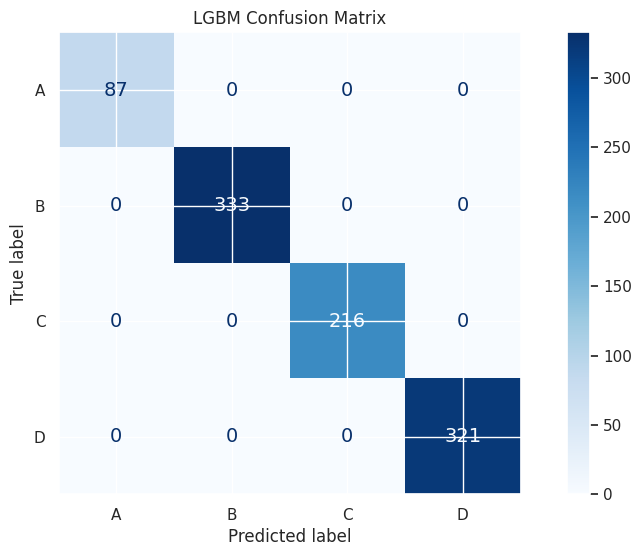

In [ ]:
# LGBM
best_lgbm_model.fit(train_X, train_y)
y_pred = best_lgbm_model.predict(train_X)

cm = confusion_matrix(train_y, y_pred, labels=[0, 1, 2, 3])
disp = ConfusionMatrixDisplay(cm, display_labels=['A', 'B', 'C', 'D'])
disp.plot(cmap='Blues')
plt.title("LGBM Confusion Matrix")
plt.show()

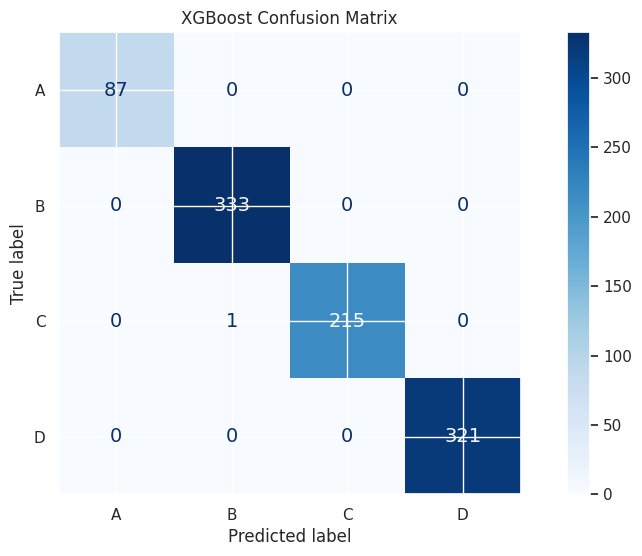

In [ ]:
# XGBoost
best_xgb_model.fit(train_X, train_y)
y_pred = best_xgb_model.predict(train_X)

cm = confusion_matrix(train_y, y_pred, labels=[0, 1, 2, 3])
disp = ConfusionMatrixDisplay(cm, display_labels=['A', 'B', 'C', 'D'])
disp.plot(cmap='Blues')
plt.title("XGBoost Confusion Matrix")
plt.show()

In [ ]:
# 최종 모델을 생성하고 전체 데이터를 학습 시킨다.
best_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', verbosity=0)
best_model.set_params(**xgboost_grid_clf.best_params_)
best_model.fit(train_X, train_y)
best_model

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [ ]:
# 학습 모델 등을 저장한다.
save_objects = {
    'model': best_model,
    'encoder': encoder,   # ← 존재할 경우만
    'scaler': scaler1      # ← 존재할 경우만
}

with open(best_model_path, 'wb') as fp:
    pickle.dump(save_objects, fp)

In [ ]:
# 저장 확인
# 불러오기
with open(best_model_path, 'rb') as fp:
    loaded = pickle.load(fp)

# 추출
test_model = loaded['model']
test_encoder = loaded.get('encoder')  # 없는 경우 None
test_scaler = loaded.get('scaler')

In [ ]:
r1 = test_model.predict(train_X)
r2 = f1_score(train_y, r1, average='macro')  # 또는 'micro'
print("F1 Macro:", r2)

F1 Macro: 0.9990451410025846
